In [1]:
import pandas as pd
import numpy as np
import os, json
import matplotlib.pyplot as plt
import torch

plt.rc('font', family='serif')
plt.rc('xtick', labelsize='medium')
plt.rc('ytick', labelsize='medium')
plt.rc('axes', titlesize='x-large')
plt.rc('axes', labelsize='large')


table_color = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),
                (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),
                (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),
                (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]
for i in range(len(table_color)):
        r, g, b = table_color[i]
        table_color[i] = (r / 255., g / 255., b / 255.)
        
pd.set_option('display.max_rows', 10)

In [2]:
def load_reward(path, algo='trpo'):
    files_name = os.listdir(path)
    files_name.remove('model_parameters.txt')
    models = list(filter(lambda n: "model" in n,  files_name))
    if len(models)==1:
        load_path = os.path.join(path, 'model.pt')
    else: 
        temp = np.array([int(name.replace('model_','').replace('.pt','')) for name in iter(models)])
        load_path = os.path.join(path, 'model_'+str(max(temp))+'.pt')
        
    ckpt = torch.load(load_path)
    
    if algo=='trpo':
        return ckpt['avg_reward'], ckpt['std_reward'], None
    else:
        return ckpt['avg_reward'], ckpt['std_reward'], ckpt['enc_losses']

def time_to_cv(r):
    temp = np.where(r>(-200))[0]
    if len(temp)==0:
        return len(r)
    else: 
        return temp[0]

In [3]:
cdir = r'C:\Users\pierr\Desktop\Polimi\delay_mdp\dmdp\output\tests_new_env'

In [4]:
env = 'Hopper_v2'
param = []
r_mean = []
r_std = []
enc_loss = []
for f in os.listdir(os.path.join(cdir,env)):
    print('Reading folder {}'.format(f))
    delay = f.split('_')[-1]
    algo = f.split('_')[0]
    for d in os.listdir(os.path.join(cdir,env,f)):
        if os.path.exists(os.path.join(cdir,env,f,d,"model_parameters.txt")):
            with open(os.path.join(cdir,env,f,d,'model_parameters.txt')) as file:
                param.append(json.loads(file.read())) 
            r_mean_, r_std_, enc_loss_ = load_reward(os.path.join(cdir,env,f,d),algo)
            param[-1]['r_mean'] = np.array(r_mean_)
            param[-1]['r_std'] = np.array(r_std_)
            param[-1]['enc_loss'] = np.array(enc_loss_)
            param[-1]['delay'] = delay
            param[-1]['algo'] = algo
        
data = pd.DataFrame.from_dict(param)
# data['name'] = [i.split('/')[-1] for i in data['save_dir']]
data

Reading folder trpo_delay_0
Reading folder trpo_delay_5


,mode,env,delay,seeds,curr_seed,train_render,train_render_ep,force_stoch_env,stoch_mdp_param,memoryless,...,cg_iters,backtrack_iters,backtrack_coeff,lam,save_dir,save_period,r_mean,r_std,enc_loss,algo
0,train,Hopper-v2,0,"[0, 1, 2]",0,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests,100,"[8.160017061405084, 8.45540437641674, 9.346354...","[2.697295100040792, 2.8641873410808483, 3.5001...",None,trpo
1,train,Hopper-v2,0,"[0, 1, 2]",1,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests,100,"[15.196549958658382, 18.761614788834088, 25.54...","[12.87447517404899, 15.947175409451859, 31.813...",None,trpo
2,train,Hopper-v2,0,"[0, 1, 2]",2,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests,100,"[22.160488021441893, 35.974733665726994, 44.79...","[19.80293271563122, 35.21693482035011, 39.5473...",None,trpo
3,train,Hopper-v2,5,[0],0,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests5/Hopper-v2-Results/Hopp...,100,"[51.54764843939885, 56.741856018232745, 58.027...","[46.03274190540447, 49.89925660925608, 43.0103...",None,trpo
4,train,Hopper-v2,5,"[1, 2, 3]",1,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests5/Hopper-v2-Results/Hopp...,100,"[17.01943776551219, 18.826211593460318, 26.944...","[14.755311954019964, 16.945335539155337, 35.27...",None,trpo
5,train,Hopper-v2,5,"[1, 2, 3]",2,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests5/Hopper-v2-Results/Hopp...,100,"[15.233484378673376, 18.484384757239724, 20.34...","[9.790757434309304, 15.779746476385453, 19.177...",None,trpo
6,train,Hopper-v2,5,"[1, 2, 3]",3,False,1,False,1,False,...,10,10,0.8,0.97,./output/new_env/tests5/Hopper-v2-Results/Hopp...,100,"[21.277061442200687, 28.575085585319883, 35.55...","[18.398291198921374, 35.506404407388125, 40.85...",None,trpo


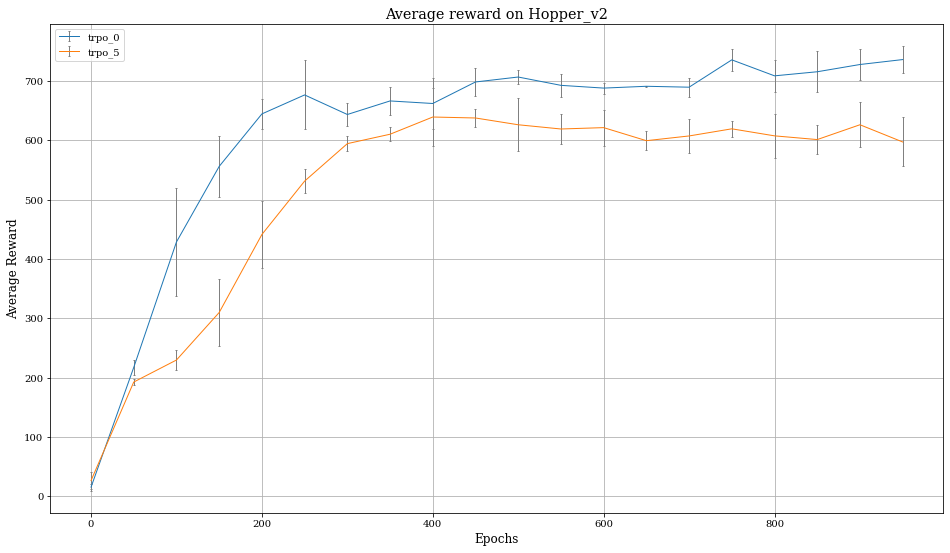

In [5]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
color = 0
for d_i, delay in enumerate(data['delay'].unique()):
    d_data = data[data['delay']==delay]
    for a_i, algo in enumerate(d_data['algo'].unique()):
        a_data = d_data[d_data['algo']==algo]
        min_len = min([len(i) for i in a_data['r_mean']])
        r = np.stack([i[:min_len] for i in a_data['r_mean']])

        # Plot Range Settings
        r_avg = np.mean(r,axis=0)
        r_std = np.std(r,axis=0)
        epoch_ticks = np.arange(len(r_avg), step=50)
#         epoch_ticks =  np.array([int(i) for i in np.linspace(0,len(r_avg)-1,25)])

        # Plot Data
        ax.errorbar(epoch_ticks, r_avg[epoch_ticks], yerr=r_std[epoch_ticks], color=table_color[color], 
                    linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='_'.join((algo,delay)))
        color += 2

# Plot Decoration Settings
ax.legend(fontsize='medium',loc='upper left')
# ax.set_ylim(-2000, 0)
# ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Average reward on {}'.format(env))
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
plt.grid()

In [70]:
env = 'Walker2d_v2'
param = []
r_mean = []
r_std = []
enc_loss = []
for f in os.listdir(os.path.join(cdir,env)):
    print('Reading folder {}'.format(f))
    delay = f.split('_')[-1]
    algo = f.split('_')[0]
    for d in os.listdir(os.path.join(cdir,env,f)):
        if os.path.exists(os.path.join(cdir,env,f,d,"model_parameters.txt")):
            with open(os.path.join(cdir,env,f,d,'model_parameters.txt')) as file:
                param.append(json.loads(file.read())) 
            r_mean_, r_std_, enc_loss_ = load_reward(os.path.join(cdir,env,f,d),algo)
            param[-1]['r_mean'] = np.array(r_mean_)
            param[-1]['r_std'] = np.array(r_std_)
            param[-1]['enc_loss'] = np.array(enc_loss_)
            param[-1]['delay'] = delay
            param[-1]['algo'] = algo
        
data = pd.DataFrame.from_dict(param)
# data['name'] = [i.split('/')[-1] for i in data['save_dir']]
data

Reading folder dtrpo_delay_5
Reading folder trpo_delay_0
Reading folder trpo_delay_5


,mode,env,seeds,curr_seed,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,use_belief,...,hidden_dim_maf,save_dir,r_mean,r_std,enc_loss,algo,train_render,train_render_ep,memoryless,test_epoch
0,train,Walker2d-v2,[0],0,5,False,50.0,0.7,False,True,...,16.0,./output/dtrpo/Walker2d-v2-Results/Walker2d-v2...,"[3.0349476359200844, 4.647176148816247, 4.3788...","[7.286459613761883, 8.194091878781142, 9.64430...","[24.5004825592041, 24.259681701660156, 24.3507...",dtrpo,NaN,NaN,NaN,NaN
1,train,Walker2d-v2,"[1, 2, 3, 4]",1,5,False,50.0,0.7,False,True,...,16.0,./output/dtrpo/Walker2d-v2-Results/Walker2d-v2...,"[0.17369287547862503, 0.611058086929198, 0.512...","[3.878672296002479, 4.010840026297176, 3.83890...","[22.19996452331543, 21.925251007080078, 21.853...",dtrpo,NaN,NaN,NaN,NaN
2,train,Walker2d-v2,[0],0,0,NaN,NaN,NaN,False,NaN,...,NaN,./output/new_env/tests0/Walker2d-v2-Results/Wa...,"[5.772607872568286, 4.233430737084882, 5.15299...","[16.089938890400365, 14.96437190532772, 12.385...",None,trpo,False,1.0,False,0.0
3,train,Walker2d-v2,"[1, 2, 3, 4]",1,0,NaN,NaN,NaN,False,NaN,...,NaN,./output/new_env/tests0/Walker2d-v2-Results/Wa...,"[1.362898031390017, 2.171231111889175, 3.02888...","[3.14266010081642, 4.057124571446144, 5.014345...",None,trpo,False,1.0,False,0.0
4,train,Walker2d-v2,"[1, 2, 3, 4]",2,0,NaN,NaN,NaN,False,NaN,...,NaN,./output/new_env/tests0/Walker2d-v2-Results/Wa...,"[-7.022001831627209, -6.301660585427691, -5.66...","[3.065218944270791, 3.258129071306811, 3.56983...",None,trpo,False,1.0,False,0.0
5,train,Walker2d-v2,"[1, 2, 3, 4]",3,0,NaN,NaN,NaN,False,NaN,...,NaN,./output/new_env/tests0/Walker2d-v2-Results/Wa...,"[-5.543726767001138, -4.798936694486388, -3.97...","[3.4815614212533865, 3.657923305485381, 3.9620...",None,trpo,False,1.0,False,0.0
6,train,Walker2d-v2,[0],0,5,NaN,NaN,NaN,False,NaN,...,NaN,./output/new_env/tests5/Walker2d-v2-Results/Wa...,"[1.8169054299715794, 2.748657675881698, 2.8975...","[4.737886871858549, 5.247640290200197, 5.15048...",None,trpo,False,1.0,False,0.0


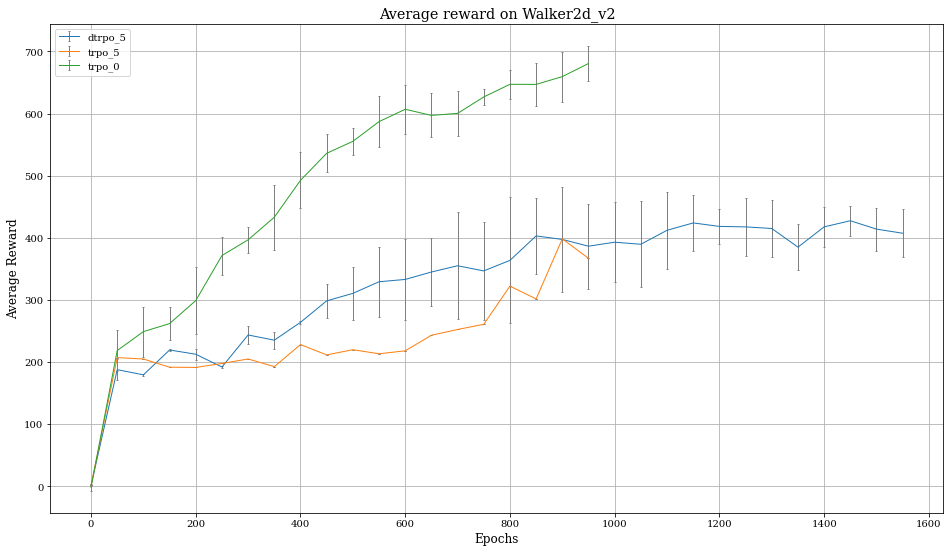

In [88]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
color = 0
for d_i, delay in enumerate(data['delay'].unique()):
    d_data = data[data['delay']==delay]
    for a_i, algo in enumerate(d_data['algo'].unique()):
        a_data = d_data[d_data['algo']==algo]
        min_len = min([len(i) for i in a_data['r_mean']])
        r = np.stack([i[:min_len] for i in a_data['r_mean']])

        # Plot Range Settings
        r_avg = np.mean(r,axis=0)
        r_std = np.std(r,axis=0)
        epoch_ticks = np.arange(len(r_avg), step=50)
#         epoch_ticks =  np.array([int(i) for i in np.linspace(0,len(r_avg)-1,25)])

        # Plot Data
        ax.errorbar(epoch_ticks, r_avg[epoch_ticks], yerr=r_std[epoch_ticks], color=table_color[color], 
                    linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='_'.join((algo,delay)))
        color += 2

# Plot Decoration Settings
ax.legend(fontsize='medium',loc='upper left')
# ax.set_ylim(-2000, 0)
# ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Average reward on {}'.format(env))
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
plt.grid()

In [91]:
env = 'Reacher_v2'
param = []
r_mean = []
r_std = []
enc_loss = []
for f in os.listdir(os.path.join(cdir,env)):
    print('Reading folder {}'.format(f))
    delay = f.split('_')[-1]
    algo = f.split('_')[0]
    for d in os.listdir(os.path.join(cdir,env,f)):
        if os.path.exists(os.path.join(cdir,env,f,d,"model_parameters.txt")):
            with open(os.path.join(cdir,env,f,d,'model_parameters.txt')) as file:
                param.append(json.loads(file.read())) 
            r_mean_, r_std_, enc_loss_ = load_reward(os.path.join(cdir,env,f,d),algo)
            param[-1]['r_mean'] = np.array(r_mean_)
            param[-1]['r_std'] = np.array(r_std_)
            param[-1]['enc_loss'] = np.array(enc_loss_)
            param[-1]['delay'] = delay
            param[-1]['algo'] = algo
        
data = pd.DataFrame.from_dict(param)
# data['name'] = [i.split('/')[-1] for i in data['save_dir']]
data

Reading folder dtrpo_delay_5
Reading folder trpo_delay_0
Reading folder trpo_delay_5


,mode,env,first_seed,n_seeds,delay,stochastic_delays,max_delay,delay_proba,force_stoch_env,use_belief,...,r_mean,r_std,enc_loss,algo,seeds,curr_seed,train_render,train_render_ep,memoryless,test_epoch
0,train,Reacher-v2,0.0,1.0,5,False,50.0,0.7,False,False,...,"[-238.76231871152126, -247.19756220838818, -25...","[13.730101279774045, 14.730473468216559, 13.69...","[73.88639068603516, 116.77127075195312, 149.58...",dtrpo,NaN,NaN,NaN,NaN,NaN,NaN
1,train,Reacher-v2,NaN,NaN,0,NaN,NaN,NaN,False,NaN,...,"[-934.7719149060296, -914.6405154849351, -855....","[582.2697989652806, 616.7878877769618, 556.149...",None,trpo,[0],0.0,False,1.0,False,0.0
2,train,Reacher-v2,NaN,NaN,5,NaN,NaN,NaN,False,NaN,...,"[-51.349770213608295, -49.702047422340414, -46...","[7.3468982086572145, 6.679358640711621, 6.4693...",None,trpo,[0],0.0,False,1.0,False,0.0


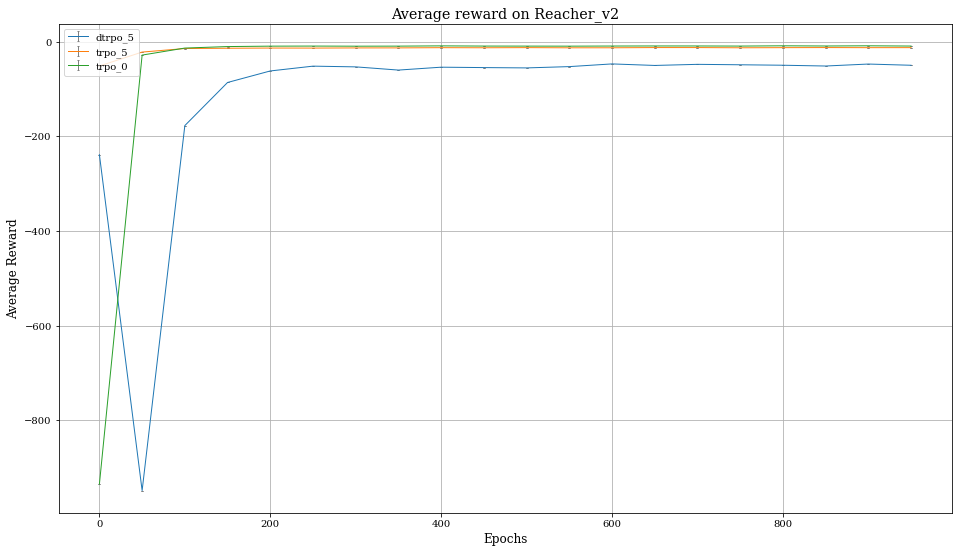

In [92]:
fig = plt.figure(figsize=(16, 9))
fig.patch.set_facecolor('white')
ax = fig.add_subplot(1, 1, 1)
color = 0
for d_i, delay in enumerate(data['delay'].unique()):
    d_data = data[data['delay']==delay]
    for a_i, algo in enumerate(d_data['algo'].unique()):
        a_data = d_data[d_data['algo']==algo]
        min_len = min([len(i) for i in a_data['r_mean']])
        r = np.stack([i[:min_len] for i in a_data['r_mean']])

        # Plot Range Settings
        r_avg = np.mean(r,axis=0)
        r_std = np.std(r,axis=0)
        epoch_ticks = np.arange(len(r_avg), step=50)
#         epoch_ticks =  np.array([int(i) for i in np.linspace(0,len(r_avg)-1,25)])

        # Plot Data
        ax.errorbar(epoch_ticks, r_avg[epoch_ticks], yerr=r_std[epoch_ticks], color=table_color[color], 
                    linewidth=1, ecolor='grey', elinewidth=1, capsize=1, label='_'.join((algo,delay)))
        color += 2

# Plot Decoration Settings
ax.legend(fontsize='medium',loc='upper left')
# ax.set_ylim(-2000, 0)
# ax.set_xticks(np.arange(0, 501, 100))
ax.set_title('Average reward on {}'.format(env))
ax.set_xlabel('Epochs')
ax.set_ylabel('Average Reward')
plt.grid()